In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PROJECT_ROOT = os.path.expanduser("~/CS7643-Group-Proj/")
print("PROJECT_ROOT:", PROJECT_ROOT)

# add to python path
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)
DATA_ROOT = os.path.join(PROJECT_ROOT, "data")

PROJECT_ROOT: /home/hice1/ivalle3/CS7643-Group-Proj/


In [3]:
# import trains and imports model
from src.models.build_sample_model import trained_net, test_loader, train_loader, val_loader
from src.data.io import clean_hand_mask

PROJECT_ROOT: /home/hice1/ivalle3/CS7643-Group-Proj/
using cuda
[S1HandDataset] Loaded 252 pairs (split=train)
[S1HandDataset] Loaded 89 pairs (split=valid)
[S1HandDataset] Loaded 90 pairs (split=test)


/home/hice1/ivalle3/miniconda3/envs/cs7643-flood/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hice1/ivalle3/miniconda3/envs/cs7643-flood/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/hice1/ivalle3/miniconda3/envs/cs7643-flood/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/home/hice1/ivalle3/miniconda3/envs/cs7643-flood/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments othe

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4


In [5]:
len(test_loader.dataset)

90

In [9]:
test_loader.dataset[2][1]

tensor([[255, 255, 255,  ...,   0,   0,   0],
        [255, 255, 255,  ...,   0,   0,   0],
        [255, 255, 255,  ...,   0,   0,   0],
        ...,
        [255, 255, 255,  ..., 255, 255, 255],
        [255, 255, 255,  ..., 255, 255, 255],
        [255, 255, 255,  ..., 255, 255, 255]])

In [180]:
def visualize_masks(net, test_loader, sample_idx = None):
    if sample_idx is None:
        sample_idx = np.random.randint(len(test_loader.dataset))
    if torch.cuda.is_available():
        device = 'cuda'
    else:
        device = 'cpu'
    plt.title('Hand-Labeled Mask')
    target = test_loader.dataset[sample_idx][1]
    true_mask = target == 1
    target = true_mask * 1
    plt.imshow(target, cmap = 'Reds')
    with torch.no_grad():
        preds = trained_net(torch.unsqueeze(test_loader.dataset[sample_idx][0], dim = 0).to(device))
        pred_mask = np.argmax(preds['out'].cpu().numpy()[0], axis = 0)
    plt.figure()
    plt.title('Predicted Mask')
    plt.imshow(pred_mask, cmap = 'Reds')

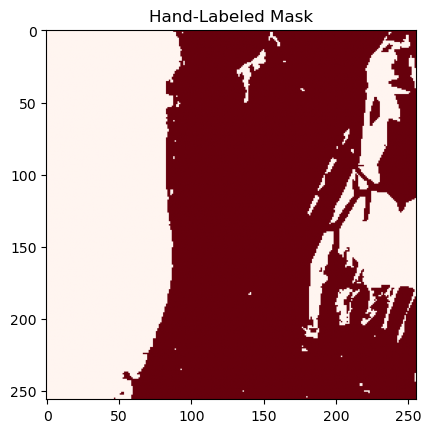

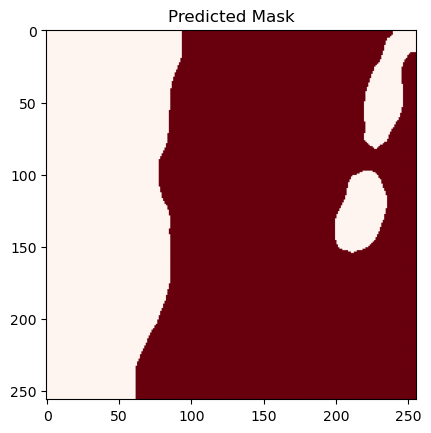

In [182]:
visualize_masks(trained_net, test_loader)

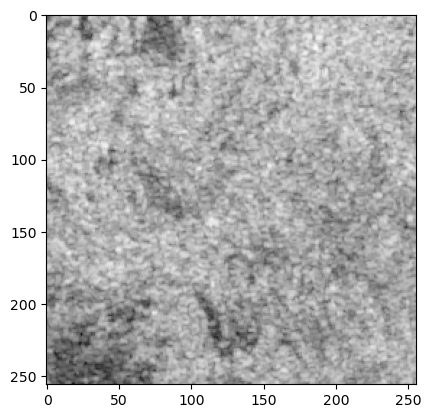

In [6]:
plt.imshow(test_loader.dataset[35][0][0], cmap = 'gray')

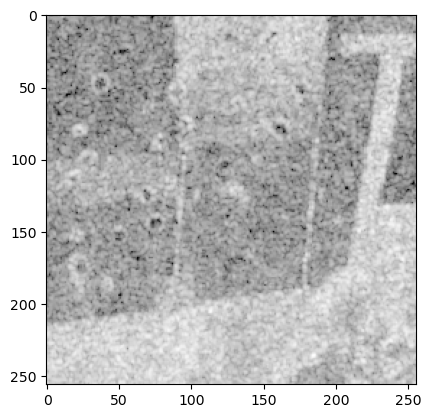

In [43]:
plt.imshow(test_loader.dataset[45][0][1], cmap = 'gray')

In [8]:
def denorm(band, mean, std):
    return np.clip(band * std + mean, 0.0, 1.0)

def denormalize_s1(x_norm):
    return x_norm * 51.0 - 50.0

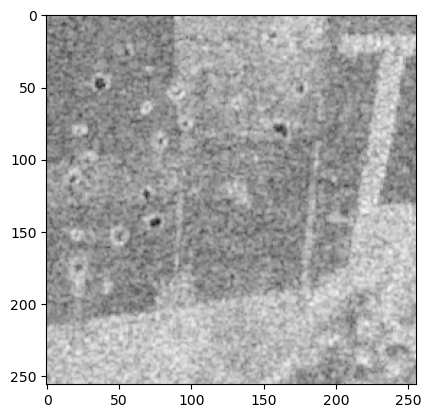

In [13]:
plt.imshow(denormalize_s1(test_loader.dataset[45][0][0]), cmap = 'gray')